<a href="https://colab.research.google.com/github/xinnazim/esaa/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2031031 유지민 통프 HW6

In [ ]:
%pip install ISLP

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
from tqdm import tqdm

# HW Problem 1: Iris data

We will be using the famous Iris dataset, which contains measurements of the sepal length, sepal width, petal length, and petal width for three species of iris flowers (Iris setosa, Iris versicolor, and Iris virginica). The goal is to predict the species of an iris flower based on these measurements.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()

# Convert the data to PyTorch tensors
X = torch.tensor(iris.data, dtype=torch.float32)
y = torch.tensor(iris.target, dtype=torch.long)

t = torch.nn.functional.one_hot(torch.tensor(y, dtype=torch.int64), num_classes=3)
t = torch.tensor(t, dtype=torch.float32)


# Normalize the input data
mean = torch.mean(X, dim=0)
std = torch.std(X, dim=0)
X = (X - mean) / std

# Split the dataset into training and validation sets
X_train, X_val, t_train, t_val = train_test_split(X, t, test_size=0.2, random_state=42)

# Create PyTorch Datasets
train_dataset = TensorDataset(X_train, t_train)
val_dataset = TensorDataset(X_val, t_val)

# Define the data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


<ipython-input-2-d11aa3dd3743>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.nn.functional.one_hot(torch.tensor(y, dtype=torch.int64), num_classes=3)
<ipython-input-2-d11aa3dd3743>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.tensor(t, dtype=torch.float32)


Use `neural networks` and `multinomial logistic regression model` to classiy the iris, and calculate the test error. Try to provide the best `neural networks` with the smallest test error rate.

In [ ]:
X.shape

torch.Size([150, 4])

## Exercise 2.3.3. Iris data (Offline)

We will be using the famous Iris dataset, which contains measurements of the sepal length, sepal width, petal length, and petal width for three species of iris flowers (Iris setosa, Iris versicolor, and Iris virginica). The goal is to predict the species of an iris flower based on these measurements.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()

# Convert the data to PyTorch tensors
X = torch.tensor(iris.data, dtype=torch.float32)
y = torch.tensor(iris.target, dtype=torch.long)

t = torch.nn.functional.one_hot(torch.tensor(y, dtype=torch.int64), num_classes=3)
t = torch.tensor(t, dtype=torch.float32)


# Normalize the input data
mean = torch.mean(X, dim=0)
std = torch.std(X, dim=0)
X = (X - mean) / std

# Split the dataset into training and validation sets
X_train, X_val, t_train, t_val = train_test_split(X, t, test_size=0.2, random_state=42)

# Create PyTorch Datasets
train_dataset = TensorDataset(X_train, t_train)
val_dataset = TensorDataset(X_val, t_val)

# Define the data loaders
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


<ipython-input-44-8c6f6fee426b>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.nn.functional.one_hot(torch.tensor(y, dtype=torch.int64), num_classes=3)
<ipython-input-44-8c6f6fee426b>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.tensor(t, dtype=torch.float32)


Use multinomial logistic regression model to classiy the iris, and calculate the test error.

> hw6. neural network 사용

# mulitinomial logistic
* 다중 클래스: 3
* x의 파라미터: 4

In [ ]:
z_model = torch.nn.Linear(4,3, bias=True) #X:[n, 4] #name changed

#z_model(X) = X@W+b,    W:[4,3],    b = [3]
loss_fn = torch.nn.CrossEntropyLoss(reduction='mean')
# loss_fn(Z, T): -loglike(Multinomial(Q, T))

optimizer = torch.optim.SGD(z_model.parameters(), lr=0.01)
history=[]
epochs = 100000
n=len(train_loader.dataset)

for epoch in range(epochs):
  epoch_loss = 0.0
  for xx, tt in train_loader:
    zhat = z_model(xx) #xx@W+b, x 2차원 배열이니까 reshape 필요 없음

    loss = loss_fn(zhat, tt) #cross-entropy loss = - log-lik(Multi(q, tt))
    loss.backward()
    epoch_loss += loss.item()*len(xx)

    optimizer.step()
    optimizer.zero_grad()
  history.append(epoch_loss/n)

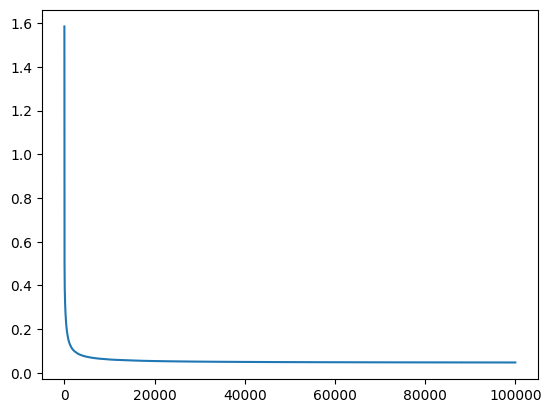

In [ ]:
plt.plot(history)

In [ ]:
test_acc_sum=0
for xx, tt in test_loader:
  zhat_test = z_model(xx) # x_test: [n_test, 4]
  Q_test= torch.softmax(zhat_test, axis=1) # Q_test: [n_test, 3]
  # y_test
  y_hat = torch.argmax(Q_test, axis=1).to(torch.float32) # y_hat: [n_test,]
  yy = torch.argmax(tt, axis=1).to(torch.float32)
  test_acc_sum +=torch.sum(y_hat == yy) # 여기서의 tt는 yy와 같음

print(f'test accuracy: {test_acc_sum / len(val_dataset)}')

test accuracy: 1.0


test_error = 1 - accuracy = 0

# Nerual network

In [ ]:
class my_dn2(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = torch.nn.Linear(4,128) # 노드 너무 많아지면 과적합 우려
        self.relu1 = torch.nn.ReLU() #활성화 함수 중 Relu 가장 안정적
        self.linear2 = torch.nn.Linear(128, 64) #128 자리에 2의 거듭제곱
        self.linear3 = torch.nn.Linear(64, 32)
        self.linear4 = torch.nn.Linear(32, 3) # output값 = class num !!
    def forward(self, x):
        x = self.linear1(x)
        x = self.relu1(x)
        x = self.linear2(x)
        x = self.relu1(x)
        x = self.linear3(x)
        x = self.relu1(x)
        x = self.linear4(x) # linear 개수도 상관 없음
        x = self.relu1(x)
        return x

In [ ]:
DN2 = my_dn2()
loss_ftn = torch.nn.CrossEntropyLoss() #qhat으로 안바꿔도되니까 크로스엔트로피 사용
optimizer = torch.optim.SGD(DN2.parameters(), lr=0.01)
history = []

In [ ]:
epochs=100000
history=[]

for epoch in tqdm(range(epochs)):
  running_loss =0
  for xx, tt in train_loader:
    optimizer.zero_grad() # 그래디언트 비우기
    zhat = DN2(xx)
    loss = loss_ftn(zhat, tt) # 크로스엔트로피 -> zhat
    loss.backward()
    optimizer.step()
    running_loss += loss.item()*len(xx)
  history.append(running_loss/len(train_loader.dataset))

100%|██████████| 100000/100000 [18:44<00:00, 88.93it/s]


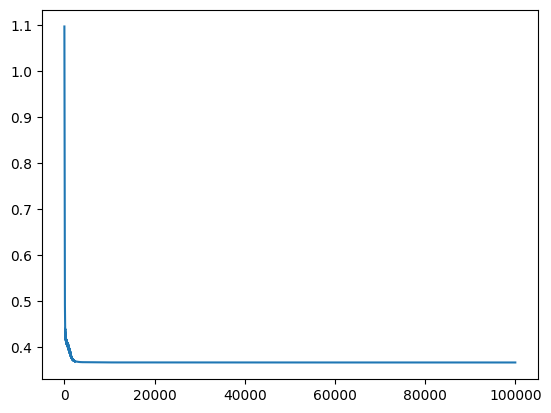

In [ ]:
plt.plot(history)

In [ ]:
for xx, tt in test_loader: # xx,tt가 test안의 모든 데이터 셋
  zhat_test = DN2(xx) # x_test: [n_test, 4]
  Q_test= torch.softmax(zhat_test, axis=1) # Q_test: [n_test, 3]
  # y_test
  y_hat = torch.argmax(Q_test, axis=1).to(torch.float32) # y_hat: [n_test,], 어떤 클래스로 분류되어있는지
  yy = torch.argmax(tt, axis=1).to(torch.float32) #원핫인코딩된 값 클래스로 바뀌게 argmax

print(f'accuracy: {sum(y_hat == yy) / len(val_dataset)}')

accuracy: 0.4333333373069763


> validation set이 30개고 test가 32라서 전체 다 돌림


In [ ]:
1- 0.4333333

0.5666667000000001

test_error = 1 - accuracy = 0.567

## HW Problem 2: Fashion MNIST data

You are given the following fashion MNIST data. Use `the multinomial regression` and `neural networks` so that the model can determine the label from the images. Calculate the test accuracy. Compare your test accuracy with that of the `linear` version of the `multinomial regression`.

1. the picture

2. predicted label

3. real label

4. Explain the possible reason why your model is wrong in this case.

Hint: Each training and test example is assigned to one of the following labels:

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot

In [ ]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
# transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
trainset = datasets.FashionMNIST('./data', download=True, train=True, transform=transform)
train_loader = DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
validationset = datasets.FashionMNIST('./data', download=True, train=False, transform=transform)
test_loader = DataLoader(validationset, batch_size=64, shuffle=True)

100%|██████████| 26421880/26421880 [00:02<00:00, 12336649.93it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 197693.82it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3693927.09it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 17684092.54it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
xx, yy = trainset[0]

Ankle boot


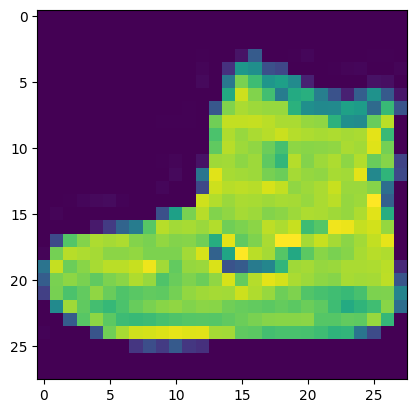

In [ ]:
plt.imshow(xx.reshape(28,28))
my_name = { 0: "T-shirt/top", 1: "Trouser",
              2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}
print(my_name[yy])

In [ ]:
X_train.shape

torch.Size([120, 4])

In [ ]:
tmp = xx.reshape(-1,784)
print(xx.shape, tmp.shape) # 64= x의 데이터 수

torch.Size([1, 28, 28]) torch.Size([1, 784])


In [ ]:
z_model = torch.nn.Linear(784, 10, bias=True) #X:[n, 784] #name changed 28*28인 2차원 배열을 784인 1차원 배열로 변경해야 input을 받아올 수 있음
# 클래스 수: 10
#z_model(X) = X@W+b,    W:[784, 10],    b = [10]

loss_ftn = torch.nn.CrossEntropyLoss(reduction='mean')
# loss_fn(Z, T): -loglike(Multinomial(Q, T))

optimizer = torch.optim.SGD(z_model.parameters(), lr=0.01)
history=[]
epochs = 30
n=len(train_loader.dataset)

for epoch in tqdm(range(epochs)):
  epoch_loss = 0.0
  for xx, tt in train_loader:
    zhat = z_model(xx.reshape(-1,784)) #xx@W+b (1차원 배열로 바꿔야함)

    loss = loss_ftn(zhat, tt) #cross-entropy loss = - log-lik(Multi(q, tt))
    loss.backward()
    epoch_loss += loss.item()*len(xx)

    optimizer.step()
    optimizer.zero_grad()

  history.append(epoch_loss/n)

100%|██████████| 30/30 [08:12<00:00, 16.43s/it]


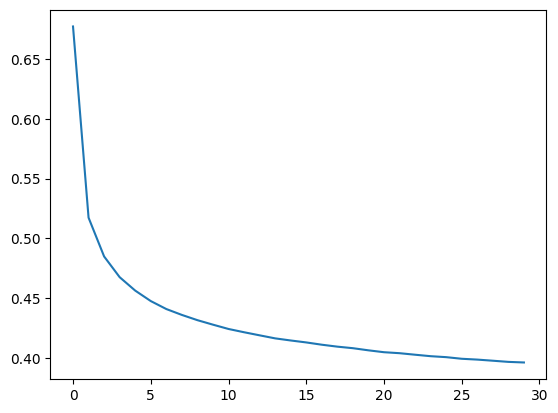

In [ ]:
plt.plot(history)

In [ ]:
test_acc_sum=0
for xx, tt in test_loader:
  zhat_test = z_model(xx.reshape(-1,784)) # x_test: [n_test, 4]
  Q_test= torch.softmax(zhat_test, axis=1) # Q_test: [n_test, 3]
  # y_test
  y_hat = torch.argmax(Q_test, axis=1).to(torch.float32) # y_hat: [n_test,]

  test_acc_sum +=torch.sum(y_hat == tt) # 여기서의 tt는 yy와 같음

print(f'test accuracy: {test_acc_sum / len(validationset)}')

test accuracy: 0.8424999713897705


# NN modeling

In [ ]:
class my_dn2(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = torch.nn.Linear(784,128)
        self.relu1 = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(128, 64)
        self.linear3 = torch.nn.Linear(64, 32) # 증폭하지말고 거듭제곱 값 줄이면서하는게 좋음, 손실해둔걸 다시 증폭 X (성능면에서)
        self.linear4 = torch.nn.Linear(32, 10) # output값 = class num !!
    def forward(self, x):
        x = self.linear1(x)
        x = self.relu1(x)
        x = self.linear2(x)
        x = self.relu1(x)
        x = self.linear3(x)
        x = self.relu1(x)
        x = self.linear4(x)
        x = self.relu1(x)
        return x

In [ ]:
DN2 = my_dn2() # 클래스 받아오는 값
loss_ftn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(DN2.parameters(), lr=0.01)
history = []

In [ ]:
epochs=30
history=[]

for epoch in tqdm(range(epochs)):
  running_loss =0
  for xx, tt in train_loader:
    optimizer.zero_grad()
    zhat = DN2(xx.reshape(-1,784)) # 이미지 데이터니까 784로 바꿈
    loss = loss_ftn(zhat, tt) # 크로스엔트로피 -> zhat
    loss.backward()
    optimizer.step()
    running_loss += loss.item()*len(xx)
  history.append(running_loss/len(train_loader.dataset))

100%|██████████| 30/30 [08:27<00:00, 16.92s/it]


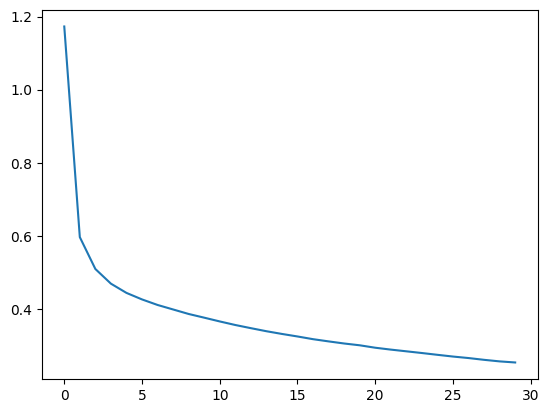

In [ ]:
plt.plot(history)

In [ ]:
test_acc_sum=0
for xx, tt in test_loader: # xx,tt가 test안의 모든 데이터 셋
  zhat_test = DN2(xx.reshape(-1,28*28)) # x_test: [n_test, 784]
  Q_test= torch.softmax(zhat_test, axis=1) # Q_test: [n_test,10]
  # y_test
  y_hat = torch.argmax(Q_test, axis=1).to(torch.float32) # y_hat: [n_test,]
  test_acc_sum += torch.sum(y_hat == tt)

print(f'total accuracy: {test_acc_sum / len(validationset)}')

total accuracy: 0.8740000128746033


NN model의 accuracy가 더 높음